<span style="background-color: yellow; font-size: 24px;">
<b> NAME : </b> Anmol Sinha <br/>
<b> SECTION : </b> 1 <br/>
<b> BITS-ID : </b> 2025AE05129 <br/>
<b> Assignment : </b> 1 <br/>
<b> Subject : </b> MFML
</span>

<hr/>

# (Q1) - Ans.1

In [1]:
import numpy as np

In [2]:
mn = float(input("Enter the 'Mean' for the Standard Gauss Normal Distribution: "))
sd = abs(float(input("Enter the 'Standard Deviation' for the Standard Gauss Normal Distribution: ")))
rows,cols=50,6

Enter the 'Mean' for the Standard Gauss Normal Distribution:  0.0
Enter the 'Standard Deviation' for the Standard Gauss Normal Distribution:  +1.0


In [3]:
f1,f2,f3,f4 = np.random.normal(loc=mn, scale=sd, size=(4,rows))
f5 = 2*f1+f2
f6 = f3-f4

In [4]:
''' method-1 '''
X = np.array([f1, f2, f3, f4, f5, f6]).T

''' method-2 '''
X1 = np.column_stack([f1, f2, f3, f4, f5, f6])
print("Do both built-in functions provide same matrix :",np.allclose(X,X1,atol=0))

X[abs(X) < 1e-8] = 0.0
print("Size of our generated matrix-X : ", X.shape)
X

Do both built-in functions provide same matrix : True
Size of our generated matrix-X :  (50, 6)


array([[-3.47801708e-01,  7.88248793e-01,  1.21467179e-01,
         5.51958748e-01,  9.26453767e-02, -4.30491569e-01],
       [ 1.15540458e+00,  4.70341316e-01,  1.49573785e-01,
        -1.20220187e-01,  2.78115047e+00,  2.69793972e-01],
       [ 3.64235833e-01, -5.68187254e-01, -1.66088608e+00,
         1.22829738e-02,  1.60284412e-01, -1.67316906e+00],
       [ 6.26616601e-01,  6.66395515e-01,  4.05072843e-02,
         1.07374433e+00,  1.91962872e+00, -1.03323705e+00],
       [ 3.22152580e-01, -4.60477439e-01, -1.17065467e+00,
         9.08865447e-01,  1.83827721e-01, -2.07952012e+00],
       [-8.37136226e-01,  6.78289924e-01, -1.48138287e-01,
        -2.92348745e+00, -9.95982528e-01,  2.77534916e+00],
       [-1.06714276e+00,  1.48272907e+00, -7.52882697e-01,
        -1.12651430e+00, -6.51556456e-01,  3.73631606e-01],
       [ 1.55469898e-02,  1.10919684e+00, -4.58749795e-01,
        -1.00918806e+00,  1.14029082e+00,  5.50438264e-01],
       [ 3.71472429e-02,  7.08250802e-01,  2.079

#### For round-off errors, controlling the tolerance value and setting it to 8 decimals (i.e 10<sup>-8</sup>) is an effective method. Hence we filter the absolute values less than the defined tolerance, and set them to zero explicitly.

#### Sometimes for such values as divisor in a division, skipping such values to ensure that the output does not reach a high valued output, also is required. Even when using a stable algorithm to solve a problem, the problem may be sensitive to small changes (perturbations) in the data. The perturbations can come from roundoff error, small measurement errors when collecting experimental data, noise that is not filtered out of a signal

<hr/>

# (Q1) - Ans.2

In [5]:
def gauss_jordan_elimination(A, tol=1e-8):
    # Perform Gauss-Jordan elimination on matrix A (R x C) returns the Reduced Row Echelon Form (RREF).
    A_old = A
    A = A.astype(float).copy()  # make a float copy
    R, C = A.shape
    row = 0
    
    for col in range(C):
        # Find pivot (largest absolute value for numerical stability)
        pivot = list(A[row:R,col]).index(max(A[row:R,col]))+row
        while col < C and row < R and abs(A[pivot][col]) < tol:
            pivot = np.argmax(np.abs(A[row:R,col])) + row
            # no pivot in this column
            col += 1

        if col < C and row < R:
            # Swap pivot row with current row
            A[[row, pivot]] = A[[pivot, row]]
            
            # Normalize pivot row, i.e perform row divison to get pivot element as 1 leading
            A[row] /= A[row][col]
            
            # Eliminate other rows by subtraction
            for r in range(R):
                if r != row:
                    A[r] -= A[r][col] * A[row]
            
            row += 1
    
    # Set tiny numbers to 0 for neatness
    A[np.abs(A) < tol] = 0.0
    return A, A_old.shape[0]-len([A[i] for i in range(A_old.shape[0]) if [0.]*A_old.shape[1]==list(A[i])] ), [j for i in range(A_old.shape[0]) 
                                                                                                              for j in range(A_old.shape[1]) if A[i][j]==1 and 1 not in A[i][:j]]

In [6]:
print("Showing matrix-X: ")
X

Showing matrix-X: 


array([[-3.47801708e-01,  7.88248793e-01,  1.21467179e-01,
         5.51958748e-01,  9.26453767e-02, -4.30491569e-01],
       [ 1.15540458e+00,  4.70341316e-01,  1.49573785e-01,
        -1.20220187e-01,  2.78115047e+00,  2.69793972e-01],
       [ 3.64235833e-01, -5.68187254e-01, -1.66088608e+00,
         1.22829738e-02,  1.60284412e-01, -1.67316906e+00],
       [ 6.26616601e-01,  6.66395515e-01,  4.05072843e-02,
         1.07374433e+00,  1.91962872e+00, -1.03323705e+00],
       [ 3.22152580e-01, -4.60477439e-01, -1.17065467e+00,
         9.08865447e-01,  1.83827721e-01, -2.07952012e+00],
       [-8.37136226e-01,  6.78289924e-01, -1.48138287e-01,
        -2.92348745e+00, -9.95982528e-01,  2.77534916e+00],
       [-1.06714276e+00,  1.48272907e+00, -7.52882697e-01,
        -1.12651430e+00, -6.51556456e-01,  3.73631606e-01],
       [ 1.55469898e-02,  1.10919684e+00, -4.58749795e-01,
        -1.00918806e+00,  1.14029082e+00,  5.50438264e-01],
       [ 3.71472429e-02,  7.08250802e-01,  2.079

In [7]:
rref_X,rank,pivot_cols = gauss_jordan_elimination(X)
print(f"Rank of {X.shape} matrix 'X' =", rank, "\nIs the in-built function giving same result as developed function :", np.linalg.matrix_rank(X)==rank)
print("Which column indices (0-based indexing) are the 'Pivot Columns':", pivot_cols)
print("\nShowing Reduced Row-Echelon Form (R.R.E.F) for matrix-X, after the Gauss-Jordan Elimination : ")
rref_X

Rank of (50, 6) matrix 'X' = 4 
Is the in-built function giving same result as developed function : True
Which column indices (0-based indexing) are the 'Pivot Columns': [0, 1, 2, 3]

Showing Reduced Row-Echelon Form (R.R.E.F) for matrix-X, after the Gauss-Jordan Elimination : 


array([[ 1.,  0.,  0.,  0.,  2.,  0.],
       [ 0.,  1.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0

<hr/>

# (Q1) - Ans.3 (a)

In [8]:
rows,cols = 50,6

# Manual mthod for calculating Matrix multiplication
xT_x = np.array(
    [[sum(X.T[i][k] * X[k][j] for k in range(X.shape[0] if X.T.shape[1]==X.shape[0] else 0)) for j in range(X.shape[1])] for i in range(X.T.shape[0])])

# Verification with Numpy's in-built 
print("Matrix size (rows x columns) is : ",xT_x.shape)
print("Is built-in operator for matrix multiplication, same as developed function :",np.allclose(xT_x, X.T@X, atol=1e-8))

print("\nShowing matrix for [(X_T)(X)] :")
print(xT_x)

C = 1/(X.shape[0])*xT_x   # Calculating CoVariance matrix

print("Is the generated Co-Variance matrix, same as built from built-in function :", np.allclose(C,np.cov(X.T),atol=1.))
print("\nShowing matrix-C: ")
C,np.cov(X.T)

Matrix size (rows x columns) is :  (6, 6)
Is built-in operator for matrix multiplication, same as developed function : True

Showing matrix for [(X_T)(X)] :
[[ 45.40011614   5.52080401  -2.89308447   5.88850393  96.3210363
   -8.7815884 ]
 [  5.52080401  49.51685531  -0.7400727    2.74182328  60.55846334
   -3.48189599]
 [ -2.89308447  -0.7400727   41.26140162  -8.45866165  -6.52624164
   49.72006327]
 [  5.88850393   2.74182328  -8.45866165  49.0789629   14.51883114
  -57.53762454]
 [ 96.3210363   60.55846334  -6.52624164  14.51883114 253.20053594
  -21.04507278]
 [ -8.7815884   -3.48189599  49.72006327 -57.53762454 -21.04507278
  107.25768781]]
Is the generated Co-Variance matrix, same as built from built-in function : True

Showing matrix-C: 


(array([[ 0.90800232,  0.11041608, -0.05786169,  0.11777008,  1.92642073,
         -0.17563177],
        [ 0.11041608,  0.99033711, -0.01480145,  0.05483647,  1.21116927,
         -0.06963792],
        [-0.05786169, -0.01480145,  0.82522803, -0.16917323, -0.13052483,
          0.99440127],
        [ 0.11777008,  0.05483647, -0.16917323,  0.98157926,  0.29037662,
         -1.15075249],
        [ 1.92642073,  1.21116927, -0.13052483,  0.29037662,  5.06401072,
         -0.42090146],
        [-0.17563177, -0.06963792,  0.99440127, -1.15075249, -0.42090146,
          2.14515376]]),
 array([[ 0.8679255 ,  0.10447344, -0.05674021,  0.1638066 ,  1.84032444,
         -0.22054681],
        [ 0.10447344,  1.00940189, -0.01478155,  0.06205749,  1.21834877,
         -0.07683904],
        [-0.05674021, -0.01478155,  0.84197898, -0.17433982, -0.12826197,
          1.0163188 ],
        [ 0.1638066 ,  0.06205749, -0.17433982,  0.96912684,  0.3896707 ,
         -1.14346666],
        [ 1.84032444,  1.218

<hr/>

# (Q1) - Ans.3 (b)

In [9]:
def power_method_eigens(A, num_iter: int=1000):
    # Ideally choose a random vector, to decrease the chance that our vector is orthogonal to the eigenvector
    b0 = np.random.rand(A.shape[1])
    b_j = b_k = b0.copy()
    iter_conv_j = iter_conv_k = num_iter
    flag_j = flag_k = True

    
    for _ in range(num_iter):

        ''' method-1 '''
        b_k_old = b_k
        
        b_k1 = np.dot(A, b_k)

        # calculate the norm
        b_k1_norm = np.linalg.norm(b_k1,2)

        # re normalize the vector
        b_k = (b_k1 / b_k1_norm)

        if all(abs(b_k-b_k_old)<[1e-8]*A.shape[0]) and flag_k:
            flag_k = False
            iter_conv_k = _+1
            

        ##########################################################

        ''' method-2 '''
        b_j_old = b_j
        
        b_j_norm = np.linalg.norm(b_j,2)
        
        b_j = A @ (b_j / b_j_norm)
        
        b_j_norm = np.linalg.norm(b_j,2)
        
        b_j /= b_j_norm

        if all(abs(b_j-b_j_old)<[1e-8]*A.shape[0]) and flag_j:
            flag_j = False
            iter_conv_j = _+1

        ###########################################################

        # Rayleigh quotient for eigenvalue
        dom_eigenvalue_k = (b_k @ A) @ b_k / (b_k @ b_k)
        dom_eigenvalue_new = b_j @ (A @ b_j) / (b_j @ b_j)
        
    """    
    print(np.allclose(b_k, b_j, atol=1e-8), abs(dom_eigenvalue_new-dom_eigenvalue_k) < 1e-8)
    print(iter_conv_j, iter_conv_k)
    """
    
    return np.array([b_k]).T, dom_eigenvalue_k, iter_conv_j if iter_conv_j==iter_conv_k else num_iter
    # to obtain a proper column vector n space Rnx1

In [10]:
v1,l1,_ = power_method_eigens(C)
print("EigenVector for largest eigenvalue:\n",v1)
print("\nLargest EigenValue:",l1)

EigenVector for largest eigenvalue:
 [[ 0.33846203]
 [ 0.21863866]
 [-0.05722168]
 [ 0.0952773 ]
 [ 0.89556271]
 [-0.15249898]]

Largest EigenValue: 6.198661440398096


<hr/>

# (Q1) - Ans.3 (c)

In [11]:
v2,l2,_ = power_method_eigens(C - v1@(v1.T)@C)
print("EigenVector for 2nd largest eigenvalue:\n",v2)
print("\nThe 2nd Largest EigenValue:",l2)

EigenVector for 2nd largest eigenvalue:
 [[ 0.05522945]
 [ 0.05997863]
 [ 0.36795851]
 [-0.43295394]
 [ 0.17043753]
 [ 0.80091245]]

The 2nd Largest EigenValue: 3.1171788464679233


In [12]:
class Eigen:
    Vector:  np.ndarray
    Value:  np.float64
    Iters: int
    
    def __init__(self, Vector, Value, Iters):
        self.Vector = Vector
        self.Value = Value
        self.Iters = Iters
        
    def __str__(self):
        return f"'EigenVector :\n{self.Vector}'\n\nEigenValue = {self.Value if abs(self.Value)>1e-8 else 0.0}\n\n"

In [13]:
E=[]
E.append(Eigen(*power_method_eigens(C)))

for i in range(1,min(C.shape)):
    E.append(Eigen(*power_method_eigens(C - sum(np.array([E[i-j].Vector@(E[i-j].Vector.T)@C for j in range(1,i+1) if abs(E[i-j].Value)>1e-8])))))
    
print()
[print(E[k],"-"*100) for k in range(min(C.shape))]
E


'EigenVector :
[[ 0.33846203]
 [ 0.21863866]
 [-0.05722168]
 [ 0.0952773 ]
 [ 0.89556271]
 [-0.15249898]]'

EigenValue = 6.198661440398096

 ----------------------------------------------------------------------------------------------------
'EigenVector :
[[ 0.05522945]
 [ 0.05997863]
 [ 0.36795851]
 [-0.43295394]
 [ 0.17043753]
 [ 0.80091245]]'

EigenValue = 3.1171788464679233

 ----------------------------------------------------------------------------------------------------
'EigenVector :
[[-0.46445392]
 [ 0.88401121]
 [ 0.00676217]
 [ 0.02238676]
 [-0.04489663]
 [-0.0156246 ]]'

EigenValue = 0.8733193407752435

 ----------------------------------------------------------------------------------------------------
'EigenVector :
[[ 0.00300843]
 [-0.0213825 ]
 [ 0.72660385]
 [ 0.68530185]
 [-0.01536565]
 [ 0.041302  ]]'

EigenValue = 0.7251515669103038

 ----------------------------------------------------------------------------------------------------
'EigenVector :
[[-0.35011575

<hr/>

# (Q1) - Ans.3 (d)

In [14]:
print("Eigenvector using Numpy built-in function : \n", np.linalg.eigh(C).eigenvectors.T[::-1])
print("\nEigenvalues using Numpy built-in function : \n", np.linalg.eigh(C).eigenvalues[::-1])
print("\nMapping Dictionary for each Eigenvalue, against EigenVector :\n", dict(zip(np.array(np.linalg.eigh(C).eigenvalues[::-1]), np.array(np.linalg.eigh(C).eigenvectors.T[::-1]))))
print("\nAre eigenvalues same as obtained using developed code : ",np.allclose(list(map(lambda Obj: Obj.Value, E)),np.linalg.eigh(C).eigenvalues[::-1], atol=1e-8))
print("\nAre eigenvectors same as obtained using developed code (up until rank) :",np.allclose(abs(np.array(list(map(lambda Obj:Obj.Vector.reshape(-1), E))))[:np.linalg.matrix_rank(C)],
                                                                                abs(np.linalg.eigh(C).eigenvectors.T[::-1])[:np.linalg.matrix_rank(C)],  atol=1e-8))
list(map(lambda Obj: Obj.Value, E))

Eigenvector using Numpy built-in function : 
 [[-0.33846203 -0.21863866  0.05722168 -0.0952773  -0.89556271  0.15249898]
 [-0.05522945 -0.05997863 -0.36795851  0.43295394 -0.17043753 -0.80091245]
 [ 0.46445392 -0.88401121 -0.00676217 -0.02238676  0.04489663  0.0156246 ]
 [ 0.00300843 -0.0213825   0.72660385  0.68530185 -0.01536565  0.041302  ]
 [ 0.80180601  0.40090301 -0.10902703  0.10902703 -0.40090301  0.10902703]
 [ 0.1541875   0.07709375  0.56696247 -0.56696247 -0.07709375 -0.56696247]]

Eigenvalues using Numpy built-in function : 
 [6.19866144e+00 3.11717885e+00 8.73319341e-01 7.25151567e-01
 1.35731385e-15 6.54965378e-16]

Mapping Dictionary for each Eigenvalue, against EigenVector :
 {np.float64(6.198661440398094): array([-0.33846203, -0.21863866,  0.05722168, -0.0952773 , -0.89556271,
        0.15249898]), np.float64(3.1171788464679233): array([-0.05522945, -0.05997863, -0.36795851,  0.43295394, -0.17043753,
       -0.80091245]), np.float64(0.8733193407752444): array([ 0.46445

[np.float64(6.198661440398096),
 np.float64(3.1171788464679233),
 np.float64(0.8733193407752435),
 np.float64(0.7251515669103038),
 np.float64(1.0092838453026459e-15),
 np.float64(1.0092838453026459e-15)]

#### NOTE : If we assume A has an eigenvalue that is strictly greater in magnitude than its other eigenvalues and the starting vector b0 has a nonzero component in the direction of an eigenvector associated with the dominant eigenvalue, then a subsequence ( b_k ) converges to an eigenvector associated with the dominant eigenvalue. 

#### Otherwise the value for algorithm seems to diverge, especially for EigenValue = 0, since Null Space of a full rank matrix shows varying Eigenvectors, which differ in value as algorithm diverges. Hence, we only calculated the similarity of EigenVectors up until and before the Zero EigenValues.

<hr/>

# (Q1) - Ans.3 (e)

In [15]:
print("The Iterations needed for calculating each Eigenvalues are :\n\n","EigenValue\t\tNo. of iterations\n","_"*20,"_"*20)

for i in np.array([np.round(list(map(lambda Obj: Obj.Value, E)),8),list(map(lambda Obj: Obj.Iters, E))]).T:
    print("  ",f"{i[0]:.8f}","\t\t\t",int(i[1]))

The Iterations needed for calculating each Eigenvalues are :

 EigenValue		No. of iterations
 ____________________ ____________________
   6.19866144 			 28
   3.11717885 			 15
   0.87331934 			 91
   0.72515157 			 2
   0.00000000 			 18
   0.00000000 			 19


<hr/>

# (Q2) - Ans.(a)

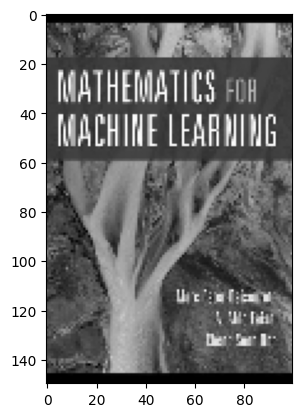

Size of Image matrix-A:  (150, 100) As per color channels, range of values is : 0 to 255


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [16]:
import cv2
from matplotlib import pyplot as plt

image_A = cv2.cvtColor(cv2.resize(cv2.imread("mfml_book_cover.jpg"),(100,150)),cv2.COLOR_BGR2GRAY)
#Show the image with matplotlib
plt.imshow(image_A,cmap='gray')
plt.show()

print("Size of Image matrix-A: ",image_A.shape,"As per color channels, range of values is :", np.min(image_A),"to",np.max(image_A))
image_A

In [17]:
def manual_svd_from_image(M, tol_eig_clipping=1e-8):
    """
    Compute SVD of image matrix M (m x n) manually using eigendecomposition of M.T@M. to return U (m x r), s (r,), Vt (r x n) 
    where r = min(m,n) (economical) which handles tiny negative eigenvalues by clipping.
    """
    M = np.array(M, dtype=np.float64, copy=True) 
    m, n = M.shape

    # 1) Compute symmetric matrices
    AtA = M.T @ M      # n x n
    AAt = M @ M.T     # m x m

    # 2) Symmetrize to remove tiny asymmetric noise
    AtA = 0.5 * (AtA + AtA.T)
    AAt = 0.5 * (AAt + AAt.T)

    # 3) Eigendecompose with eigh (stable for symmetric)
    eigvals_AtA, eigvecs_AtA = np.linalg.eigh(AtA)   # eigenvals ascending
    eigvals_AAt, eigvecs_AAt = np.linalg.eigh(AAt)

    # 4) Sort descending
    idx_AtA = eigvals_AtA.argsort()[::-1]
    idx_AAt = eigvals_AAt.argsort()[::-1]

    eigvals_AtA = eigvals_AtA[idx_AtA]
    V = eigvecs_AtA[:, idx_AtA]   # columns are v_j (n x n)

    eigvals_AAt = eigvals_AAt[idx_AAt]
    U_from_AAt = eigvecs_AAt[:, idx_AAt]  # columns are u_j (m x m)

    # 5) Report any significantly negative eigenvalues (shouldn't happen ideally)
    min_eig_AtA = eigvals_AtA.min()
    min_eig_AAt = eigvals_AAt.min()
    if min_eig_AtA < -10 * tol_eig_clipping or min_eig_AAt < -10 * tol_eig_clipping:
        print("Warning: found negative eigenvalues below clipping threshold.")
        print("min eig(M.T@M) =", min_eig_AtA, "min eig(M@M.T) =", min_eig_AAt)

    # 6) Clip small negative values to zero for stability
    eigvals_AtA = np.where(eigvals_AtA < 0, 0.0, eigvals_AtA)
    eigvals_AAt = np.where(eigvals_AAt < 0, 0.0, eigvals_AAt)

    # 7) Singular values
    singular_vals = np.sqrt(eigvals_AtA)  # length n

    # economical rank r = min(m, n)
    r = min(m, n)
    singular_vals_r = singular_vals[:r]
    V_r = V[:, :r]         # n x r
    U_r = np.zeros((m, r))

    # 8) Compute U columns from non-zero singular values: u_j = (1/s_j) * M v_j
    eps = np.finfo(float).eps
    for j in range(r):
        s = singular_vals_r[j]
        if s > max(tol_eig_clipping, eps):
            vj = V_r[:, j]
            uj = (M @ vj) / s
            U_r[:, j] = uj
        else:
            # If s is zero (or tiny), use orthonormal vector from eigendecomp of M M^T, so we can take its corresponding eigenvector from U_from_AAt if available
            # Note: U_from_AAt was computed from M M^T and sorted; use it if index exists.
            if j < U_from_AAt.shape[1]:
                U_r[:, j] = U_from_AAt[:, j]
            else:
                # fallback: random orthonormalized vector (rare)
                cand = np.random.randn(m)
                # orthonormalize w.r.t previous U_r columns
                if j > 0:
                    prev = U_r[:, :j]
                    cand = cand - prev @ (prev.T @ cand)
                cand_norm = np.linalg.norm(cand,2)
                if cand_norm < eps:
                    cand = np.ones(m)
                    cand_norm = np.linalg.norm(cand,2)
                U_r[:, j] = cand / cand_norm

    # 9) Return U_r (m x r), singular_vals_r (r,), Vt_r (r x n)
    Vt_r = V_r.T

    U_r[abs(U_r)<tol_eig_clipping]=0
    singular_vals_r[abs(singular_vals_r)<tol_eig_clipping]=0
    Vt_r[abs(Vt_r)<tol_eig_clipping]=0
    
    return {"U":U_r, "diagonal_elements(S)":singular_vals_r, "V_T":Vt_r}

manual_svd_from_image(image_A)

{'U': array([[ 2.54112084e-04, -5.62510358e-05, -1.05722988e-04, ...,
         -3.26623310e-02,  1.62353547e-03, -1.26742212e-02],
        [ 3.26982771e-04, -3.48949351e-04, -6.05619227e-04, ...,
         -1.24403563e-02,  1.84812900e-02, -2.22762765e-02],
        [ 1.75740172e-04, -5.77474064e-05, -2.10425916e-04, ...,
          4.73414622e-03, -9.35265723e-03,  3.53346234e-02],
        ...,
        [ 2.40217473e-04, -5.24057381e-05, -1.76403617e-04, ...,
          5.17547487e-03, -1.35019447e-02, -4.76431601e-03],
        [ 2.11538372e-04, -5.91177551e-05,  5.11186099e-04, ...,
         -1.01233567e-02,  6.60039613e-03, -2.21784605e-02],
        [ 4.82982881e-05,  6.77422582e-05,  4.06968773e-04, ...,
         -5.94394582e-03, -1.27262991e-02,  1.96003169e-02]]),
 'diagonal_elements(S)': array([12395.38412364,  2491.68797662,  2052.94813303,  1736.13787057,
         1304.88957166,  1089.39641778,  1077.63810652,   973.27766257,
          859.97529149,   793.10181778,   761.30597065, 

In [18]:
np.linalg.svd(image_A, full_matrices=False)

SVDResult(U=array([[-2.54112084e-04,  5.62510358e-05, -1.05722988e-04, ...,
        -3.26623310e-02, -1.62353547e-03, -1.26742212e-02],
       [-3.26982771e-04,  3.48949351e-04, -6.05619227e-04, ...,
        -1.24403563e-02, -1.84812900e-02, -2.22762765e-02],
       [-1.75740172e-04,  5.77474064e-05, -2.10425916e-04, ...,
         4.73414622e-03,  9.35265723e-03,  3.53346234e-02],
       ...,
       [-2.40217473e-04,  5.24057381e-05, -1.76403617e-04, ...,
         5.17547487e-03,  1.35019447e-02, -4.76431601e-03],
       [-2.11538372e-04,  5.91177551e-05,  5.11186099e-04, ...,
        -1.01233567e-02, -6.60039613e-03, -2.21784605e-02],
       [-4.82982881e-05, -6.77422582e-05,  4.06968773e-04, ...,
        -5.94394582e-03,  1.27262991e-02,  1.96003169e-02]]), S=array([12395.38412364,  2491.68797662,  2052.94813303,  1736.13787057,
        1304.88957166,  1089.39641778,  1077.63810652,   973.27766257,
         859.97529149,   793.10181778,   761.30597065,   750.22508673,
         701.41

In [19]:
U1,S1,V_T1 = manual_svd_from_image(image_A).values()
U2,S2,V_T2=np.linalg.svd(image_A, full_matrices=False)
print("Do we get back Image matrix-A by performing A=(U)(S)(V_T) from developed function :",np.allclose(image_A,U1@np.diag(S1)@V_T1,1e-8))
print("Do we get back Image matrix-A by performing A=(U)(S)(V_T) from in-built Numpy function :",np.allclose(image_A,U2@np.diag(S2)@V_T2,1e-8))
print("Are the developed and in-built Sigma (S) matrices same : ",all(abs(S1-S2)<1e-8))

Do we get back Image matrix-A by performing A=(U)(S)(V_T) from developed function : True
Do we get back Image matrix-A by performing A=(U)(S)(V_T) from in-built Numpy function : True
Are the developed and in-built Sigma (S) matrices same :  True


In [20]:
print("Are the developed and in-built U matrices same : ",np.allclose(U1,U2,atol=1e-8))
print("Are the developed and in-built V_T matrices same : ",np.allclose(V_T1,V_T2,atol=1e-8))

Are the developed and in-built U matrices same :  False
Are the developed and in-built V_T matrices same :  False


#### Due to difference in approach and algorithms used to approximate th values for U and V_T matrices, the invidual values for matrices obtained from in-built function vs. the developed function may differ, even though as proven above that they both yield the original matrix upon performing A=(U)(S)(V_T) for the Singular-Value Decompositions.

<hr/>

# (Q2) - Ans.(b)

In [21]:
for k in [5,10,20,40,60]:
    U_k = U1[:,:k]
    S_k = S1[:k]
    V_T_k = V_T1[:k,:]
    print("U_k =",U_k,"\ndiagonal_elements(S_k) =",S_k,"\nV_T_k",V_T_k)
    print("\n",'_'*100,"\n")

U_k = [[ 2.54112084e-04 -5.62510358e-05 -1.05722988e-04 -5.78599812e-04
   2.89095702e-04]
 [ 3.26982771e-04 -3.48949351e-04 -6.05619227e-04 -8.82400397e-04
   5.52295261e-04]
 [ 1.75740172e-04 -5.77474064e-05 -2.10425916e-04 -2.57667851e-04
   1.26173678e-04]
 [ 2.17265471e-03  2.20727306e-04 -1.61163428e-03 -3.95672892e-03
   2.71993636e-03]
 [ 9.04078967e-02 -2.85120347e-02 -9.68971934e-02 -1.23822999e-01
   3.42184765e-02]
 [ 9.41967572e-02 -3.38839196e-02 -7.41408794e-02 -1.44228763e-01
   3.25247363e-02]
 [ 9.65922258e-02 -3.91354337e-02 -1.03815586e-01 -1.76877178e-01
   7.57257398e-02]
 [ 9.96137702e-02 -4.69726776e-02 -1.08265630e-01 -1.82649090e-01
   8.28412010e-02]
 [ 9.94534475e-02 -5.03320314e-02 -1.13418615e-01 -1.97253719e-01
   7.42056742e-02]
 [ 1.02966405e-01 -5.18551957e-02 -1.15895598e-01 -1.61829896e-01
   1.10134421e-01]
 [ 1.00109392e-01 -4.09917204e-02 -1.04620823e-01 -1.48850164e-01
   1.24199884e-01]
 [ 1.00648680e-01 -5.86802566e-02 -1.02794326e-01 -1.677405

	Original 						Approximation


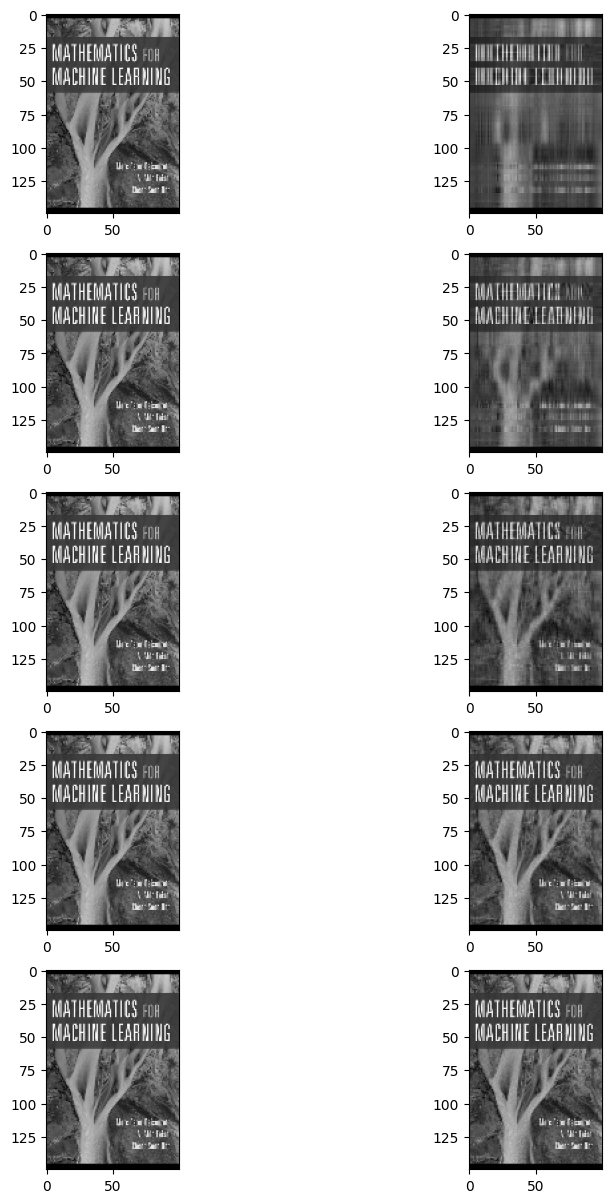

In [22]:
print("\tOriginal \t\t\t\t\t\tApproximation")
image_list = []
for k in [5,10,20,40,60]:
    image_list.extend([image_A,U1[:,:k]@np.diag(S1[:k])@V_T1[:k,:]])
_, axs = plt.subplots(len([5,10,20,40,60]), 2, figsize=(10,15))
axs = axs.flatten()
for img, ax in zip(image_list, axs):
    ax.imshow(img,cmap="grey")
plt.show()

<hr/>

# (Q2) - Ans. (c)

True True True True True 
{5: np.float64(3457.979455947291), 10: np.float64(2700.684370723745), 20: np.float64(1802.2329475635747), 40: np.float64(983.6182115066302), 60: np.float64(542.6226829640137)}


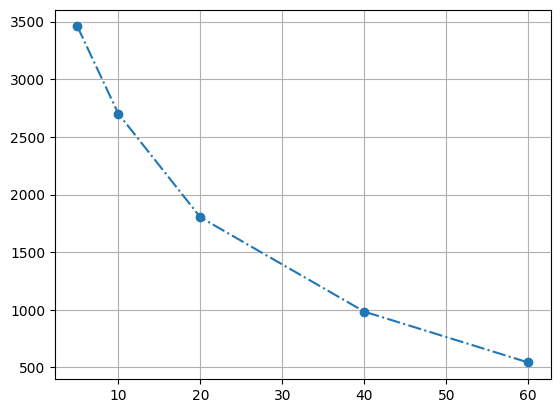

In [23]:
Errors = {}
for k in [5,10,20,40,60]: # default norm of 2-D Array Matrix is Frobenius Norm
    Errors[k] = np.sqrt(np.sum((image_A - U1[:,:k]@np.diag(S1[:k])@V_T1[:k,:])**2))
    print(abs(Errors[k] - np.linalg.norm(image_A - U1[:,:k]@np.diag(S1[:k])@V_T1[:k,:]))< 1e-8,end=" ")  # check with built-in function

print()
print(Errors)
plt.grid(axis="both")
plt.plot(Errors.keys(),Errors.values(),"-.o")

<hr/>

# (Q2) - Ans. (d)

Are all the values after matrix Rank 0's (Zero) :  True
{5: np.float64(0.933841921333878), 10: np.float64(0.9596460799895852), 20: np.float64(0.9820295101067675), 40: np.float64(0.994647074628819), 60: np.float64(0.9983709517211505)}


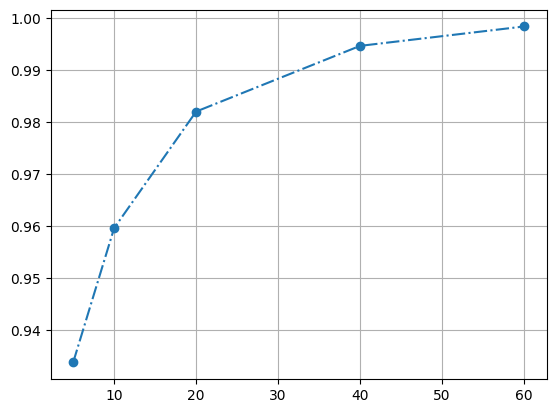

In [24]:
Energies = {}
rank_A = np.linalg.matrix_rank(image_A)
print("Are all the values after matrix Rank 0's (Zero) : ",all(S1[rank_A:]<1e-8))   # confirming the values for Sigma diagonal matrix beyond rank is 0.

for k in [5,10,20,40,60]: # default norm of 2-D Array Matrix is Frobenius Norm
    Energies[k] = sum(S1[:k]**2)/sum(S1**2)

print(Energies)
plt.grid(axis="both")
plt.plot(Energies.keys(),Energies.values(),"-.o")

<hr/>

# (Q3) - Ans.(a)

In [25]:
M = np.array([[2,1,0],[1,2,1],[0,1,2]])
M

array([[2, 1, 0],
       [1, 2, 1],
       [0, 1, 2]])

In [26]:
characteristic_polynomial = np.round(np.poly(M),8)
print("For polynomial, p(x) in degree",M.shape[0])
print("\n","Order/degree of x","\t\tCoefficient\n","_"*20,"_"*20)
for i in range(len(characteristic_polynomial)):
    print("  ",M.shape[0]-i,"\t\t\t",characteristic_polynomial[i])

roots = sorted(np.round(np.roots(characteristic_polynomial),8))[::-1]
eigenvalues_M = np.linalg.eig(M).eigenvalues  # values are sorted in descending order for this object
print("\nAre the roots of characteristic polynomial same as eigenvalues :", "Yes" if all(abs(roots-eigenvalues_M) < 1e-8) else "No")
print("Eigenvalues are : ",roots)

For polynomial, p(x) in degree 3

 Order/degree of x 		Coefficient
 ____________________ ____________________
   3 			 1.0
   2 			 -6.0
   1 			 10.0
   0 			 -4.0

Are the roots of characteristic polynomial same as eigenvalues : Yes
Eigenvalues are :  [np.float64(3.41421356), np.float64(2.0), np.float64(0.58578644)]


<hr/>

# (Q3) - Ans.(b)

In [27]:
def null_space(A, tol=1e-8):
    n_rows, n_cols = A.shape

    rref_A,rank,pivot_cols = gauss_jordan_elimination(A)

    # Identify free variables (non-pivot columns)
    free_cols = [j for j in range(n_cols) if j not in pivot_cols]
    null_basis = []

    for free in free_cols:
        z = np.zeros(n_cols)
        z[free] = 1
        # Back substitution
        for i, pivot_col in enumerate(pivot_cols[::-1]):
            rx = len(pivot_cols) - 1 - i
            z[pivot_col] = -np.dot(rref_A[rx, pivot_col+1:], z[pivot_col+1:])
        null_basis.append(z)

    return np.array(null_basis).T if null_basis else np.zeros((n_cols,0))

In [28]:
eigenvectors_m = {}
for r in roots :
    Eg = M - r*np.eye(M.shape[0])        # EigenSpace
    eigenvectors_m[r] = null_space(Eg).flatten()
    eigenvectors_m[r] /= np.linalg.norm(eigenvectors_m[r].flatten(),2)

print("Are the obtained Eigenvalues same as provided by in-built Numpy function: ",
      np.allclose(abs(np.array(list(eigenvectors_m.values()))) , abs(np.linalg.eig(M).eigenvectors), atol=1e-8))
print("Eigenvalue:\t [EigenVector]",'\n','_'*50)
eigenvectors_m

Are the obtained Eigenvalues same as provided by in-built Numpy function:  True
Eigenvalue:	 [EigenVector] 
 __________________________________________________


{np.float64(3.41421356): array([0.5       , 0.70710678, 0.5       ]),
 np.float64(2.0): array([-0.70710678, -0.        ,  0.70710678]),
 np.float64(0.58578644): array([ 0.5       , -0.70710678,  0.5       ])}

In [29]:
# Checking to see if (M)(x) = (lambda)(x)
print("If  'lambda' and 'x' denotes the eigenvalues and eigenvector for M, respectively :-\n")
print(" (M)(x) \t\t\t\t\t (lambda)(x) \t\t\t\t Are they same ? ","\n","-"*120)
for (value,vector) in eigenvectors_m.items() :
    print(M @ vector,'\t', value*vector,'\t\t', all(abs(M @ vector - value*vector)<1e-8))

If  'lambda' and 'x' denotes the eigenvalues and eigenvector for M, respectively :-

 (M)(x) 					 (lambda)(x) 				 Are they same ?  
 ------------------------------------------------------------------------------------------------------------------------
[1.70710678 2.41421356 1.70710678] 	 [1.70710677 2.41421356 1.70710678] 		 True
[-1.41421356  0.          1.41421356] 	 [-1.41421356 -0.          1.41421356] 		 True
[ 0.29289322 -0.41421356  0.29289322] 	 [ 0.29289322 -0.41421356  0.29289322] 		 True


<hr/>

# (Q3) - Ans.(c)

In [30]:
# Multiplicities
alg_mults = dict(zip(*np.unique(np.round(np.linalg.eigh(M).eigenvalues,8), return_counts=True)))
geo_mults = {eig: (lambda M, eig: M.shape[0] - np.linalg.matrix_rank(M - eig * np.eye(M.shape[0]), tol=1e-8))(M, eig) for eig in alg_mults.keys()}

print("Is matrix Diagonalizable :", "Yes" if alg_mults==alg_mults else "No")

eigvals, eigvecs = np.linalg.eigh(M)

# Construct P (eigenvectors) and D (eigenvalues)
P = eigvecs               # orthonormal eigenvectors as columns
D = np.diag(eigvals)      # diagonal matrix of eigenvalues

# Compute P D P^T
PDPt = P @ D @ P.T  # For an orthonormal/orthogonal matrix P^(-1) = P^T, by nature

np.allclose(M,PDPt,atol=1e-8)

Is matrix Diagonalizable : Yes


True

In [31]:
PDPt[abs(PDPt)<1e-8]=0
print("P = \n",P,"\n\nD = \n",D,'\n\nP^T == P^(-1) :\n',P.T,"\n\nP.D.P_T =\n",PDPt)

P = 
 [[-5.00000000e-01  7.07106781e-01  5.00000000e-01]
 [ 7.07106781e-01  3.12250226e-16  7.07106781e-01]
 [-5.00000000e-01 -7.07106781e-01  5.00000000e-01]] 

D = 
 [[0.58578644 0.         0.        ]
 [0.         2.         0.        ]
 [0.         0.         3.41421356]] 

P^T == P^(-1) :
 [[-5.00000000e-01  7.07106781e-01 -5.00000000e-01]
 [ 7.07106781e-01  3.12250226e-16 -7.07106781e-01]
 [ 5.00000000e-01  7.07106781e-01  5.00000000e-01]] 

P.D.P_T =
 [[2. 1. 0.]
 [1. 2. 1.]
 [0. 1. 2.]]


<hr/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>


# (Q3) - Ans.(d)